In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
df[(df["age"]<30) & (df["pclass"]==3)].sex.nunique()

2

In [20]:
df["sex"].describe()

count      891
unique       2
top       male
freq       577
Name: sex, dtype: object

In [2]:
def check_df(df,head=5):
    print("########### Shape ##########")
    print(df.shape)
    print("########### Types ##########")
    print(df.dtypes)
    print("########### İsnull ##########")
    print(df.isnull().sum())
    
check_df(df)

########### Shape ##########
(891, 15)
########### Types ##########
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
########### İsnull ##########
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [3]:
def cat_summary(df,col):
   print(pd.DataFrame({col:df[col].value_counts(),
                        "ratio":df[col].value_counts(normalize=True)}))
   print("#########################################################")

In [4]:
for i in ["sex","embark_town"]:
    cat_summary(df,i)

        sex     ratio
sex                  
male    577  0.647587
female  314  0.352413
#########################################################
             embark_town     ratio
embark_town                       
Southampton          644  0.724409
Cherbourg            168  0.188976
Queenstown            77  0.086614
#########################################################


In [5]:
def cat_summary(df,col,plot=False):
   print(pd.DataFrame({col:df[col].value_counts(),
                        "ratio":df[col].value_counts(normalize=True)}))
   print("#########################################################")
   if plot:
       sns.countplot(x=df[col],data=df)
       plt.show()

        sex     ratio
sex                  
male    577  0.647587
female  314  0.352413
#########################################################


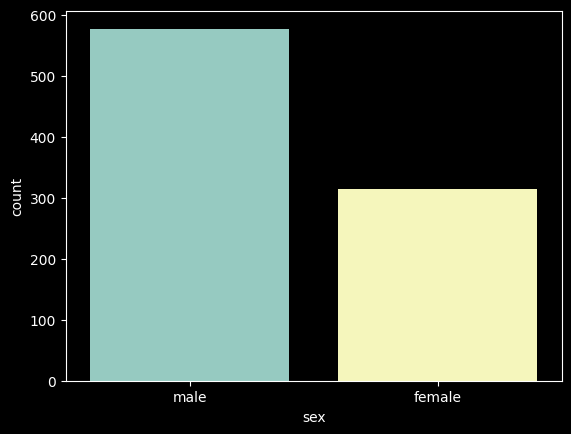

             embark_town     ratio
embark_town                       
Southampton          644  0.724409
Cherbourg            168  0.188976
Queenstown            77  0.086614
#########################################################


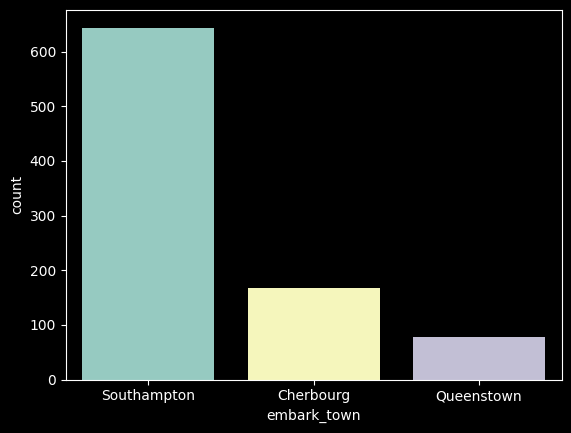

In [6]:
for i in ["sex","embark_town"]:
    cat_summary(df,i,plot=True)

In [7]:
cat_cols = list(df.select_dtypes(exclude="number"))
num_cols = list(df.select_dtypes(include="number"))

num_but_cat = [col for col in num_cols if df[col].nunique()<10]

cat_cols = cat_cols + num_but_cat
num_cols = [col for col in num_cols if col not in num_but_cat]

        sex     ratio
sex                  
male    577  0.647587
female  314  0.352413
#########################################################


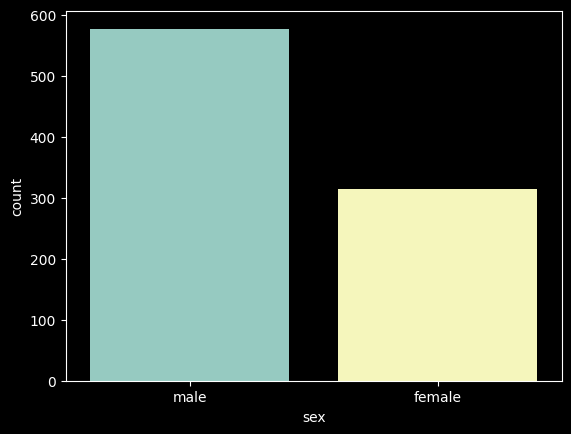

          embarked     ratio
embarked                    
S              644  0.724409
C              168  0.188976
Q               77  0.086614
#########################################################


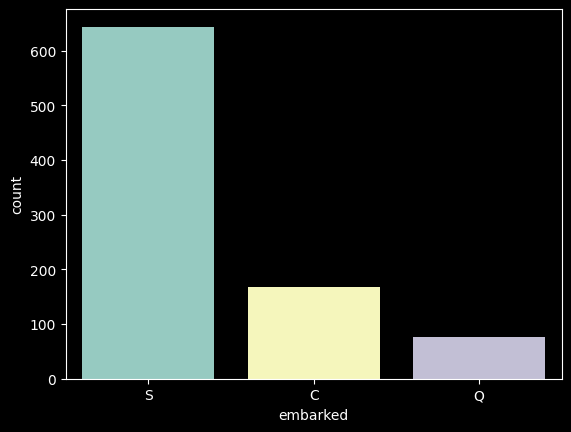

        class     ratio
class                  
Third     491  0.551066
First     216  0.242424
Second    184  0.206510
#########################################################


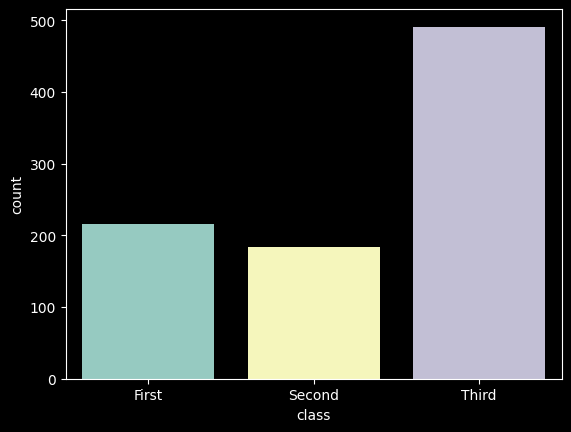

       who     ratio
who                 
man    537  0.602694
woman  271  0.304153
child   83  0.093154
#########################################################


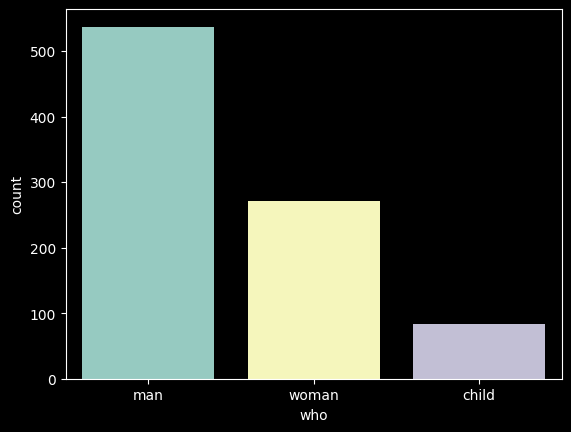

            adult_male     ratio
adult_male                      
1                  537  0.602694
0                  354  0.397306
#########################################################


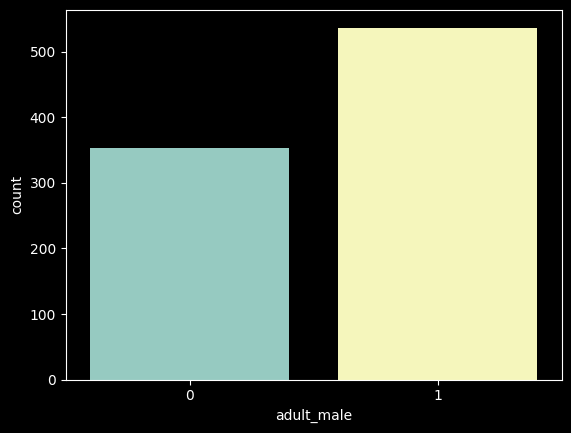

      deck     ratio
deck                
C       59  0.290640
B       47  0.231527
D       33  0.162562
E       32  0.157635
A       15  0.073892
F       13  0.064039
G        4  0.019704
#########################################################


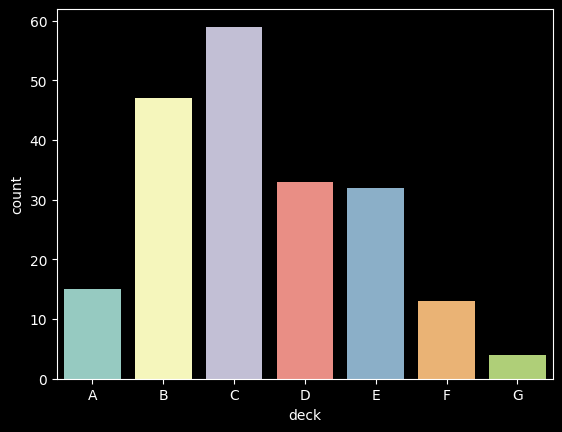

             embark_town     ratio
embark_town                       
Southampton          644  0.724409
Cherbourg            168  0.188976
Queenstown            77  0.086614
#########################################################


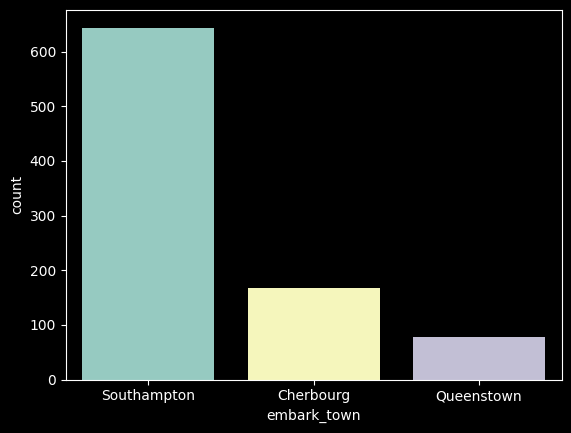

       alive     ratio
alive                 
no       549  0.616162
yes      342  0.383838
#########################################################


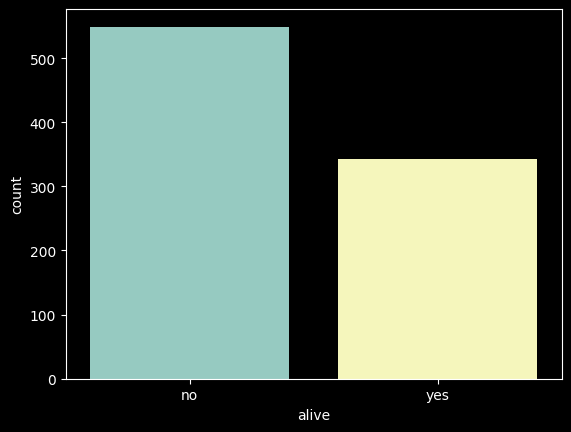

       alone     ratio
alone                 
1        537  0.602694
0        354  0.397306
#########################################################


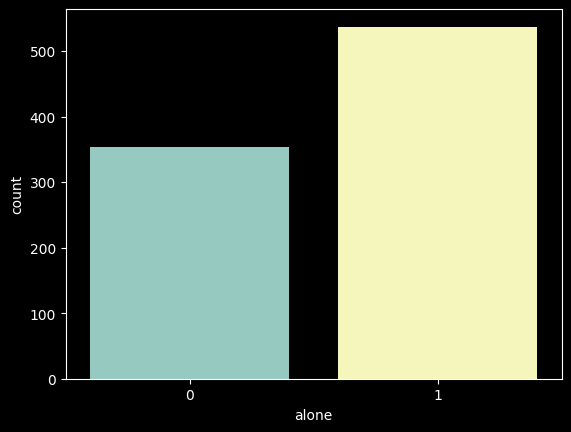

          survived     ratio
survived                    
0              549  0.616162
1              342  0.383838
#########################################################


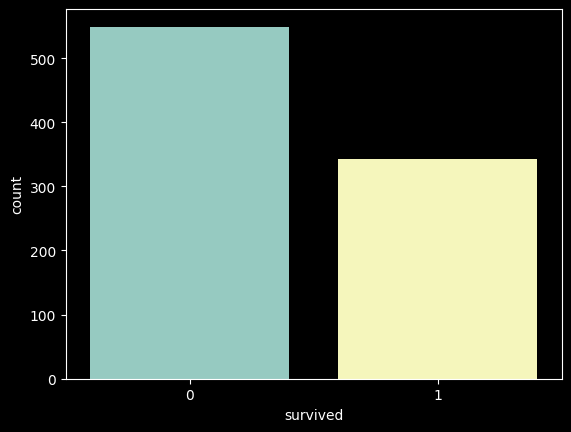

        pclass     ratio
pclass                  
3          491  0.551066
1          216  0.242424
2          184  0.206510
#########################################################


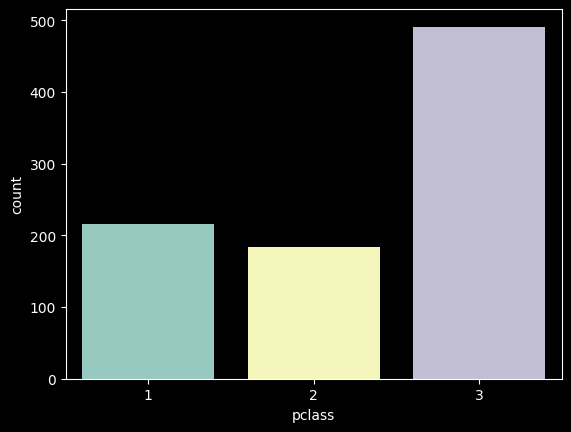

       sibsp     ratio
sibsp                 
0        608  0.682379
1        209  0.234568
2         28  0.031425
4         18  0.020202
3         16  0.017957
8          7  0.007856
5          5  0.005612
#########################################################


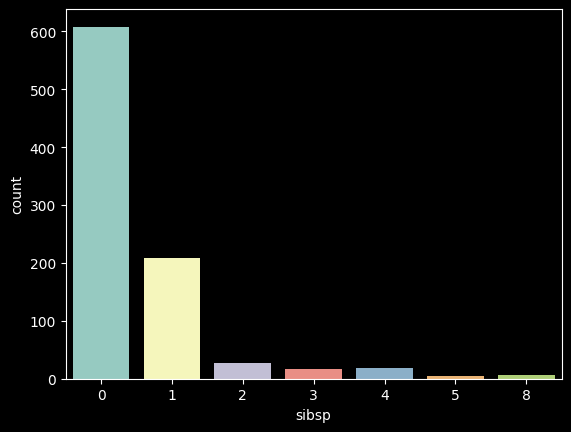

       parch     ratio
parch                 
0        678  0.760943
1        118  0.132435
2         80  0.089787
5          5  0.005612
3          5  0.005612
4          4  0.004489
6          1  0.001122
#########################################################


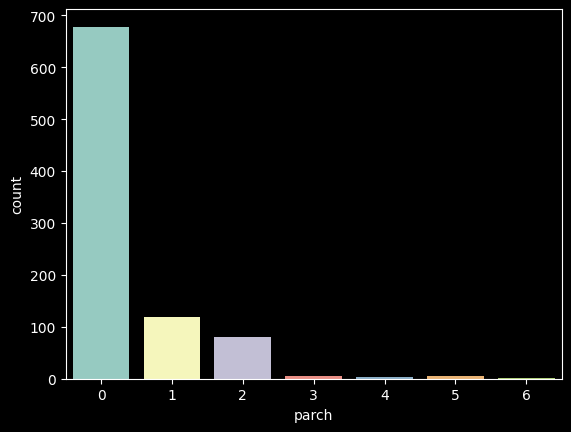

In [8]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)
    cat_summary(df,col,plot=True)

In [9]:
num_cols

['age', 'fare']

In [10]:
df[num_cols].describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


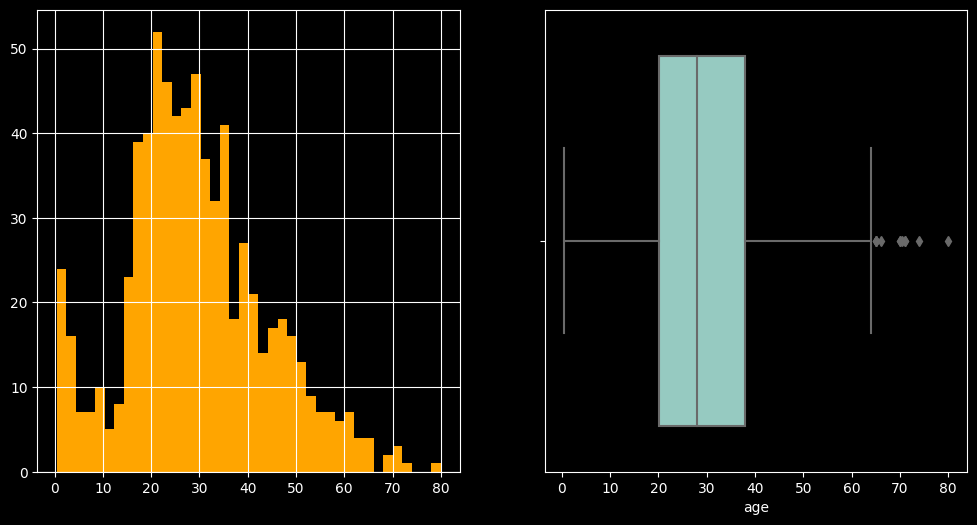

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


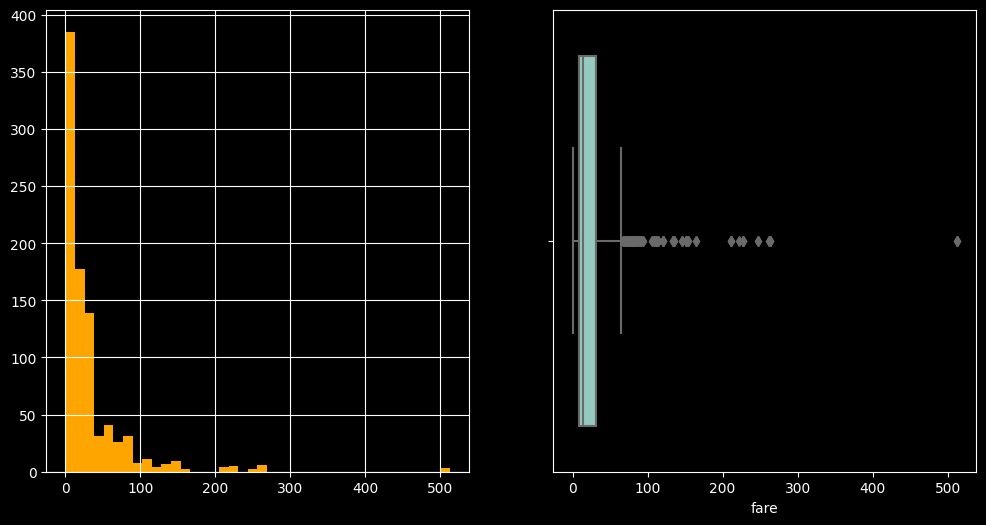

In [14]:
def num_summary(df,col,plot=False):
    print(df[col].describe())
    
    if plot:
        fig = plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        df[col].hist(bins=40,color='orange')
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col],data=df)
        plt.show()
        
for col in num_cols:
    num_summary(df,col,plot=True)